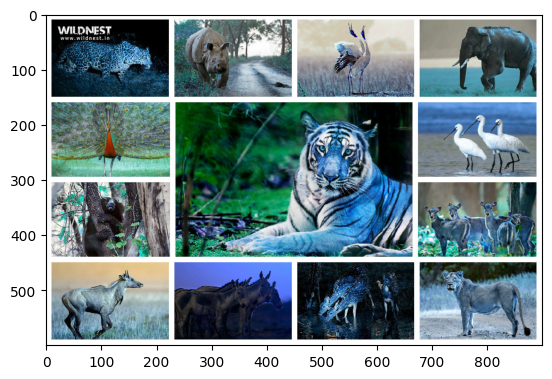

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

pic = cv2.imread('wildlife.jpg')
plt.imshow(pic)
plt.show()

In [2]:
def draw_bounding_box(click, x, y, flag_param, parameters):
    global x_pt, y_pt, drawing, top_left_point, bottom_right_point, original_image

    if click == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_pt, y_pt = x, y

    elif click == cv2.EVENT_MOUSEMOVE:
        if drawing:
            top_left_point, bottom_right_point = (x_pt,y_pt), (x,y)
            image[y_pt:y, x_pt:x] = 255 - original_image[y_pt:y, x_pt:x]
            cv2.rectangle(image, top_left_point, bottom_right_point, (0,255,0), 2)

    elif click == cv2.EVENT_LBUTTONUP:
        drawing = False
        top_left_point, bottom_right_point = (x_pt,y_pt), (x,y)
        image[y_pt:y, x_pt:x] = 255 - image[y_pt:y, x_pt:x]
        cv2.rectangle(image, top_left_point, bottom_right_point, (0,255,0), 2)
        bounding_box = (x_pt, y_pt, x-x_pt, y-y_pt)

        grabcut_algorithm(original_image, bounding_box)

In [3]:
def grabcut_algorithm(original_image, bounding_box):

    segment = np.zeros(original_image.shape[:2],np.uint8)

    x,y,width,height = bounding_box
    segment[y:y+height, x:x+width] = 1

    background_mdl = np.zeros((1,65), np.float64)
    foreground_mdl = np.zeros((1,65), np.float64)

    cv2.grabCut(original_image, segment, bounding_box, background_mdl, foreground_mdl, 5,
    cv2.GC_INIT_WITH_RECT)

    new_mask = np.where((segment==2)|(segment==0),0,1).astype('uint8')

    original_image = original_image*new_mask[:,:,np.newaxis]

    cv2.imshow('Result', original_image)

In [1]:
if __name__=='__main__':
    drawing = False
    top_left_point, bottom_right_point = (-1,-1), (-1,-1)

    original_image = cv2.imread("wildlife.jpg")
    original_image = cv2.resize( original_image ,(500,500))
    image = original_image.copy()
    cv2.namedWindow('Frame')
    cv2.setMouseCallback('Frame', draw_bounding_box)

    while True:
        cv2.imshow('Frame', image)
        c = cv2.waitKey(1)
        if c == 27:
            break

    cv2.destroyAllWindows()

NameError: ignored